<h1><strong>A COLLEGE PROJECT ABOUT COVID-19 DETECTION BY USING DEEP LEARNING BASED ON X-RAY IMAGES AND TRANSFER LEARNING (RESNET101)<strong><h1>
-Bootcamp 2021

[![Gender-Based Violence](https://www.tpp-rating.org/public/uploads/publications/34/5eac0b566c867covid-19.jpg)](https://github.com/innocoder-official?tab=repositories)

<h3><strong>PARTICIPANTS<strong><h3>


- Innocent Charles
- Daniel Methew 
- Mafiu Khatibu 




<h4>MOUNTING THE DRIVE<h4>

In [1]:
#Mounting the drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h4>UNZIPPING THE DATASET<h4>

In [2]:
#unzipping the dataset to be used in the training
!unzip "/content/drive/MyDrive/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2.zip"

Streaming output truncated to the last 5000 lines.
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1451.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1452.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1453.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1454.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1455.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1456.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1457.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1458.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1459.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-

<h4>IMPORTING THE IMPORTANT LIBRARY<h4>

In [3]:
#Importing the library for keras for cnn models based on transfer learning resnet101
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet101
from keras.applications.resnet import  preprocess_input
from keras.models import Model
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

<h4>LOADING THE DATA<h4>

In [4]:
#splitting the dataset into train,validation and test data
train_path  = "/content/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train"
valid_path  = "/content/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Validation "
test_path   = "/content/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Test"

<h4>NORMALIZING AND AUGMENTATION OF THE IMAGES DATA<h4>

In [5]:
#function to normalize and preprocessing the train images
train_data_gen = ImageDataGenerator(
                                    preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    )
#calling the train_data_gen to normalize and preproces the train images
train = train_data_gen.flow_from_directory(directory= train_path,target_size=(224,224))

Found 7000 images belonging to 2 classes.


In [6]:
#function to normalize and preprocessing the validation images
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

#calling the validation_data_gen  to normalize and preproces the validation images
valid = validation_data_gen.flow_from_directory(directory= valid_path,target_size=(224,224))

Found 2000 images belonging to 2 classes.


In [7]:
#functio to normalize and preprocessing the test images
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

#calling the test_data_gen to normalize and preproces the test images
test = train_data_gen.flow_from_directory(directory= test_path ,target_size=(224,224),shuffle= False)

Found 1000 images belonging to 2 classes.


In [8]:
# Covid +ve X-Ray is represented by 0 and Normal(covid -ve) is represented by 1
class_type = {0:'Covid',  1 : 'Normal'}

<h4>VISUALIZE THE IMAGES<h4>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


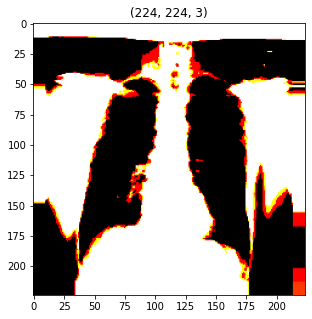

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


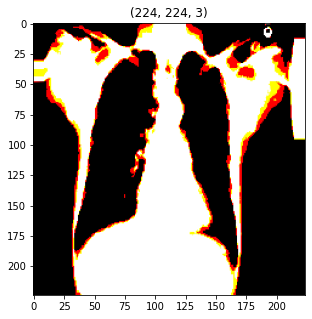

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


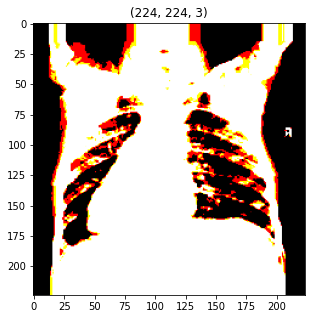

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


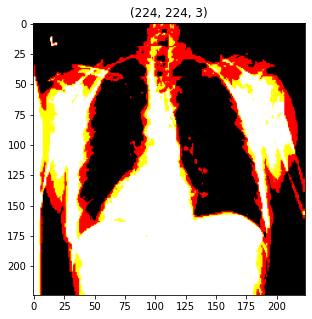

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


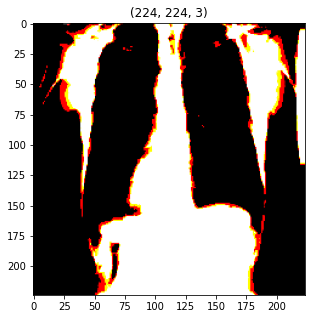

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


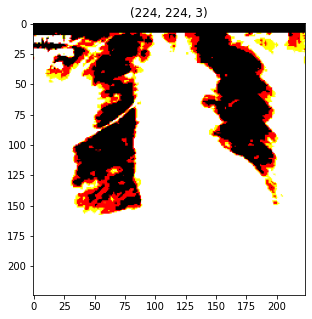

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


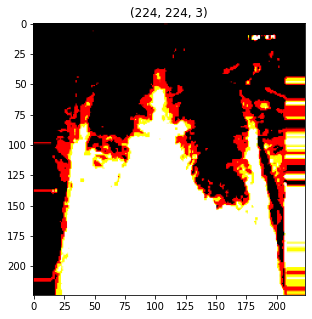

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


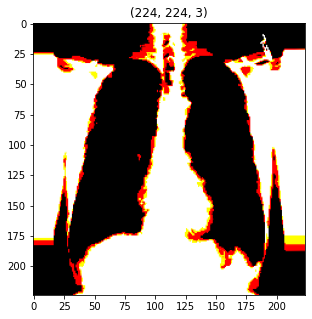

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


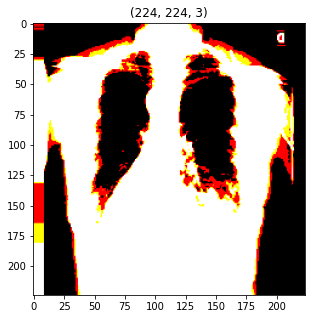

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


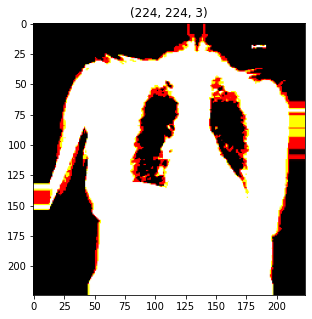

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


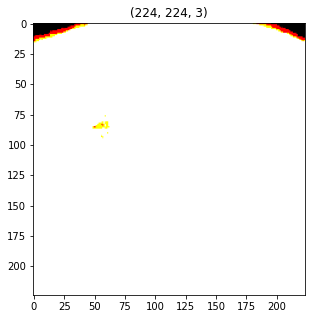

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


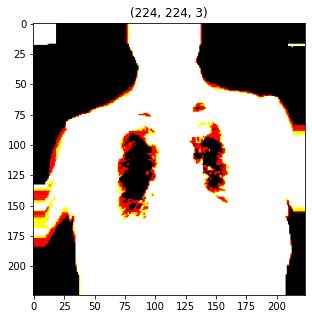

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


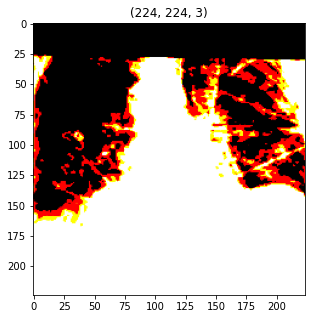

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


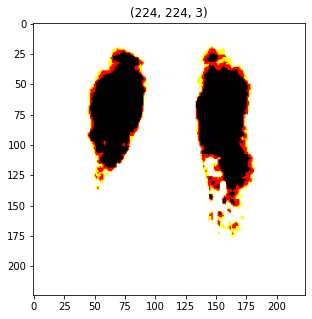

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


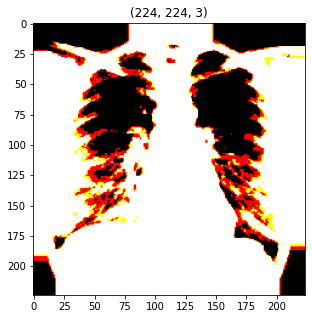

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


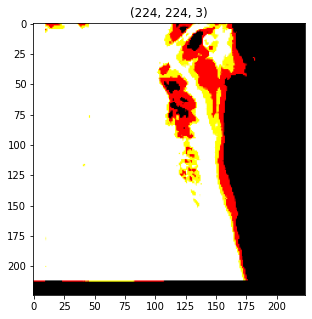

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


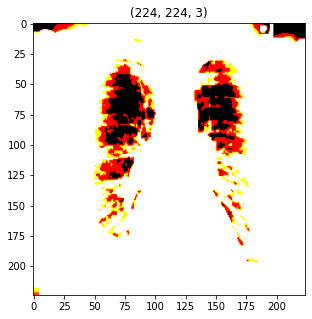

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


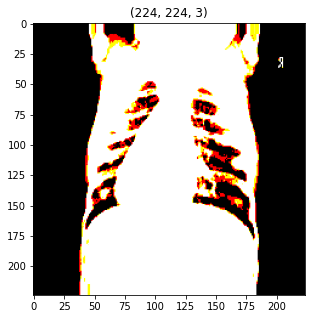

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


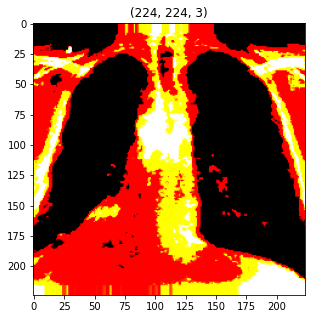

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


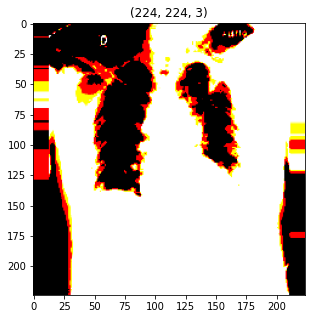

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


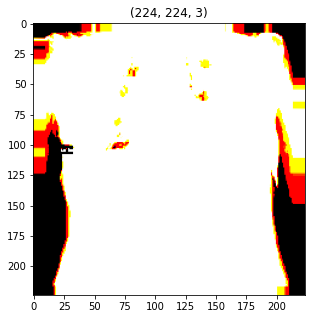

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


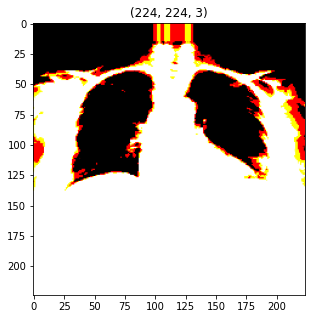

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


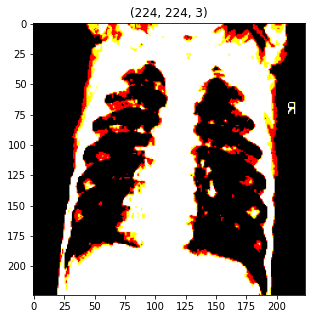

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


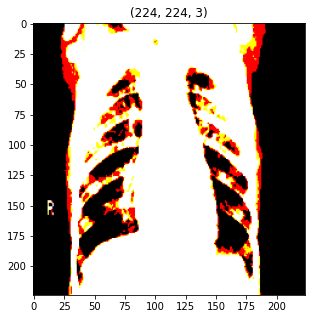

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


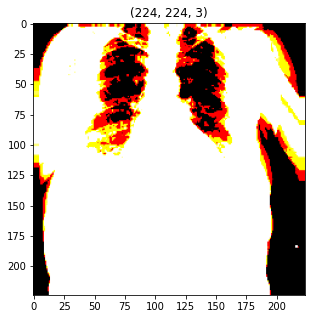

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


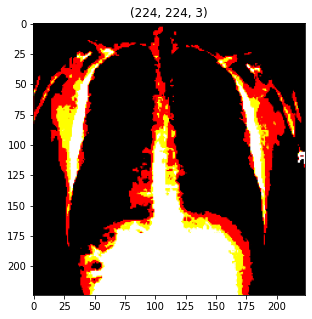

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


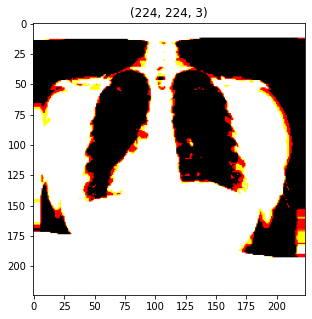

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


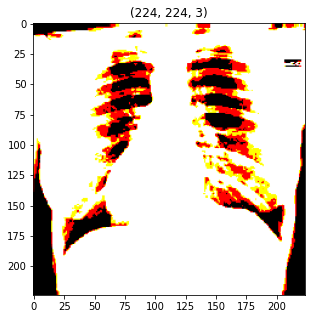

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


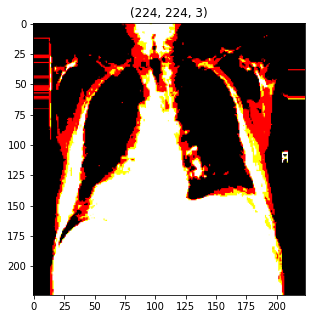

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


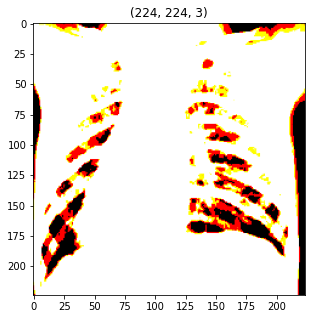

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


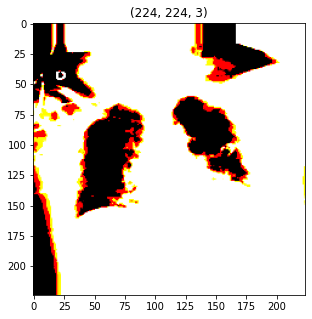

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


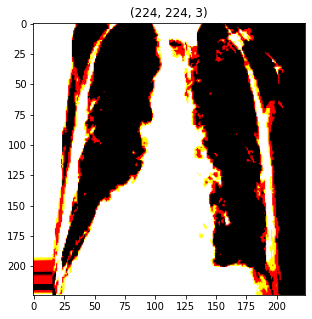

In [9]:
#visualize the images for the train data
t_img , label = train.next()
def plotImages(img_arr, label):
  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()
plotImages(t_img,label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


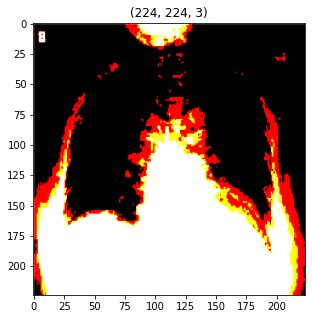

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


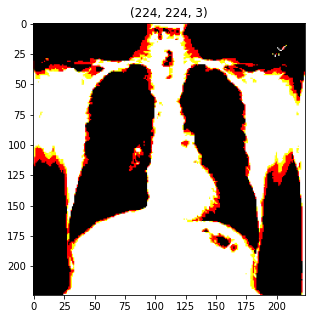

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


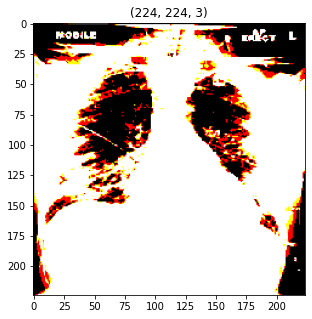

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


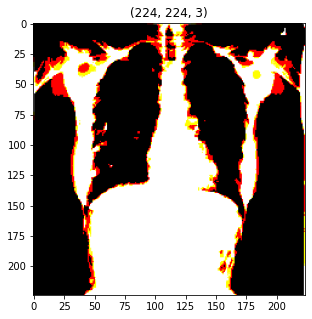

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


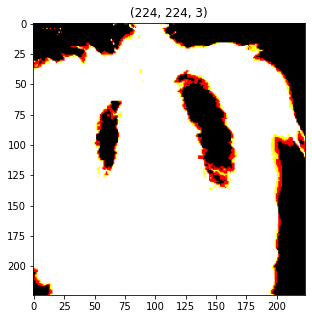

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


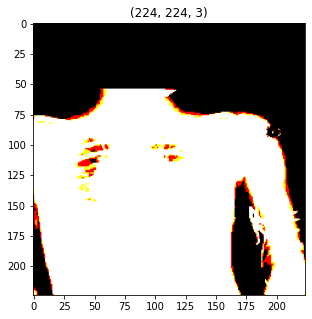

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


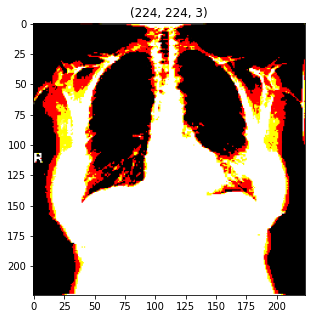

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


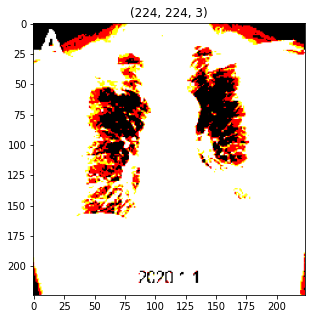

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


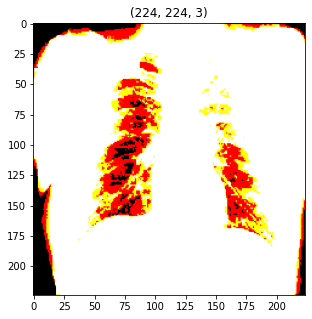

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


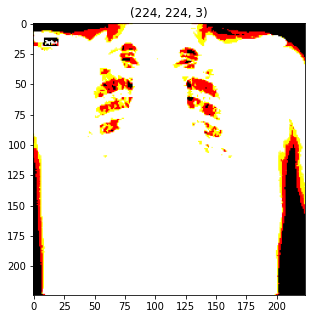

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


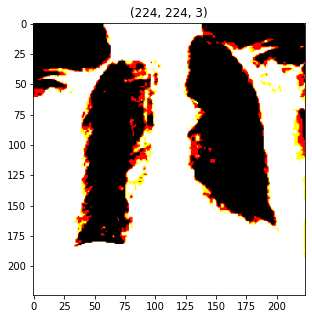

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


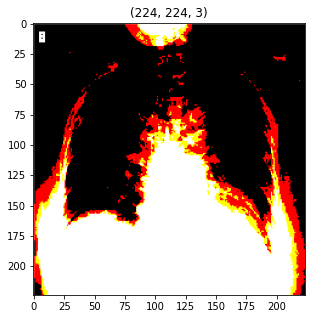

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


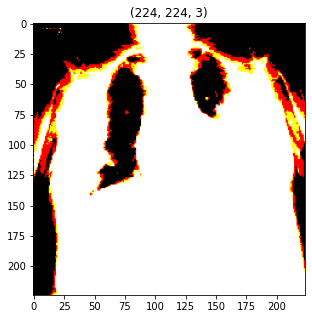

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


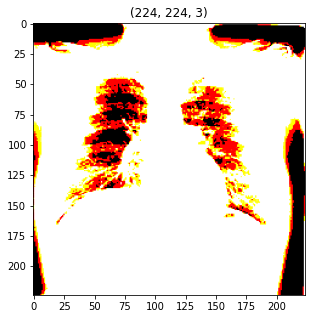

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


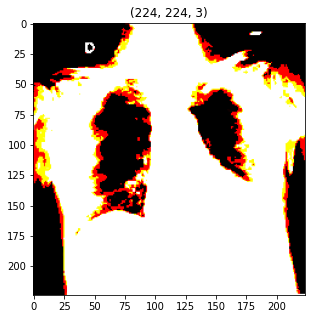

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


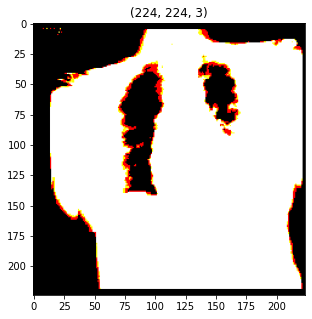

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


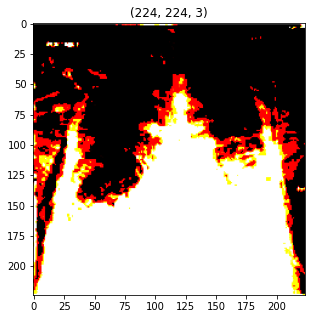

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


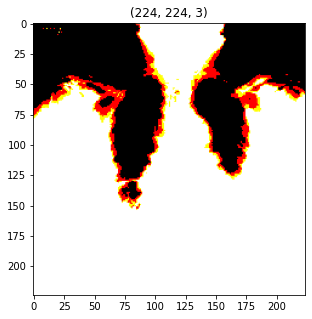

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


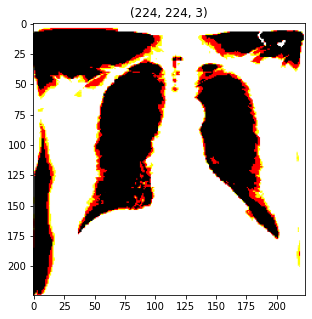

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


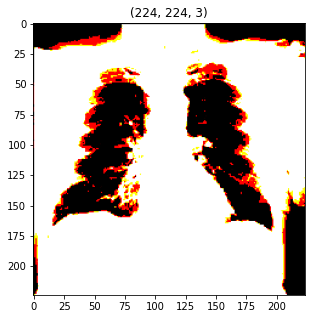

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


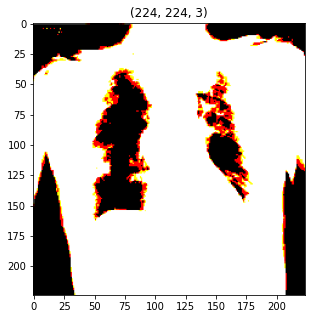

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


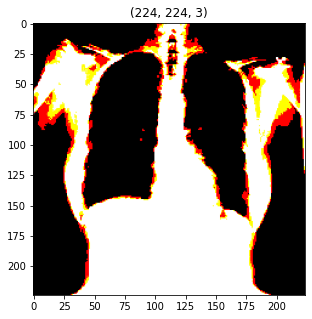

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


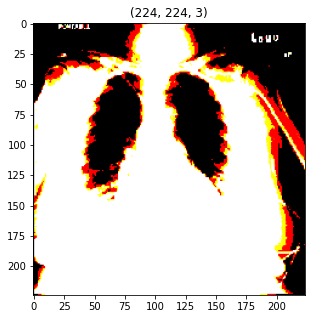

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


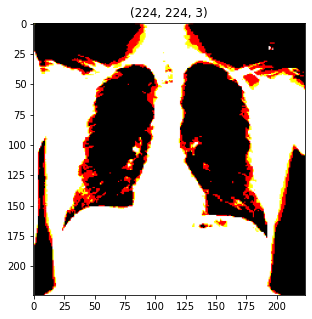

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


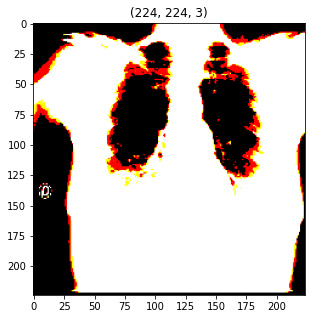

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


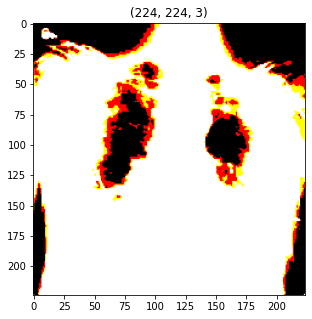

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


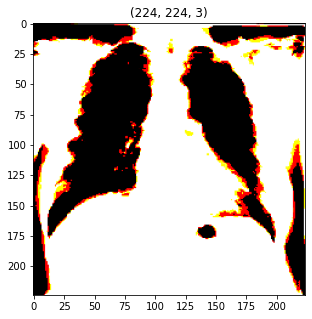

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


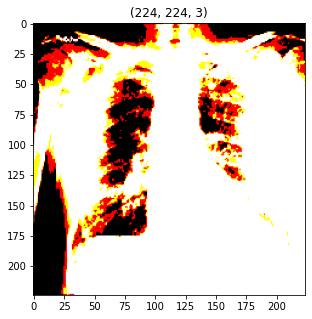

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


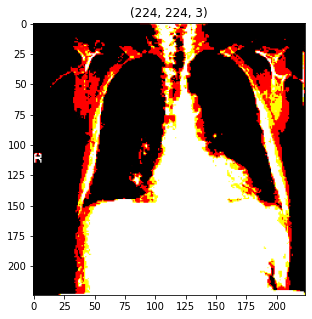

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


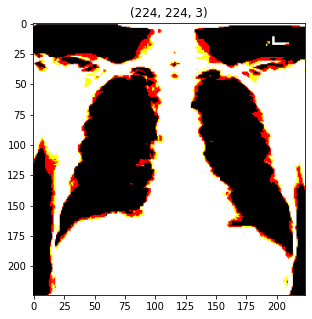

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


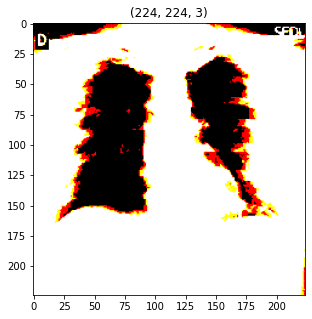

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


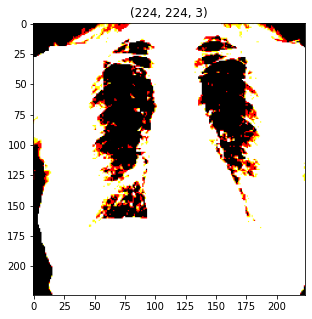

In [10]:
#visualize the images for the train data
t_img , label =valid.next()
def plotImages(img_arr, label):
  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()
plotImages(t_img,label)

<h4>BUILDING THE MODEL<h4>

In [11]:
#downloading the model
res = ResNet101(input_shape=(224,224,3),include_top= False)#include_top will consider the new weights

171458560/171446536 [==============================] - 2s 0us/step


In [12]:
#Don't train the parameters again
for layer in res.layers:           
  layer.trainable = False

In [13]:
#flatten the output layer
x = Flatten()(res.output)
x = Dense(units=2 ,activation='sigmoid', name = 'predictions')(x)
# creating our model.
model = Model(res.input,x)

In [14]:
#getting the summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
#compailing the model and using the accuracy to evaluate the model
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
#implimentating the early stoping and the check point to save for the best model
es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 15,verbose=1)
mc = ModelCheckpoint(filepath="RESNET101_BEST_MODEL_VERSION_1.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [17]:
#fitting the model on train and validation data images 
hist = model.fit_generator(train, steps_per_epoch= 50, epochs= 100, validation_data= valid , validation_steps= 5, callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 [==============================] - 70s 642ms/step - loss: 6.1547 - accuracy: 0.7956 - val_loss: 3.7117 - val_accuracy: 0.8438

Epoch 00001: val_accuracy improved from -inf to 0.84375, saving model to RESNET101_BEST_MODEL_VERSION_1.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
50/50 [==============================] - 31s 608ms/step - loss: 1.8113 - accuracy: 0.8863 - val_loss: 1.5215 - val_accuracy: 0.9062

Epoch 00002: val_accuracy improved from 0.84375 to 0.90625, saving model to RESNET101_BEST_MODEL_VERSION_1.h5
Epoch 3/100
50/50 [==============================] - 30s 588ms/step - loss: 2.1561 - accuracy: 0.8900 - val_loss: 3.1253 - val_accuracy: 0.8188

Epoch 00003: val_accuracy did not improve from 0.90625
Epoch 4/100
50/50 [==============================] - 30s 587ms/step - loss: 1.8283 - accuracy: 0.9070 - val_loss: 1.6160 - val_accuracy: 0.8938

Epoch 00004: val_accuracy did not improve from 0.90625
Epoch 5/100
50/50 [==============================] - 29s 585ms/step - loss: 2.0585 - accuracy: 0.8970 - val_loss: 3.4629 - val_accuracy: 0.8562

Epoch 00005: val_accuracy did not improve from 0.90625
Epoch 6/100
50/50 [==============================] - 29s 583ms/step - loss: 1.3435 - accuracy: 0.9209 - val_loss: 2.0111 - val_accuracy: 0.9000



In [18]:
#loading the model
model = load_model("/content/RESNET101_BEST_MODEL_VERSION_1.h5")

In [19]:
#checking the history of the model performance
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

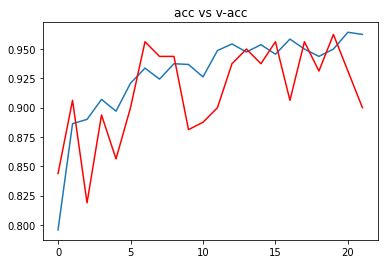

In [20]:
#ploating relation between accuracy and val_accuracy of the model 
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

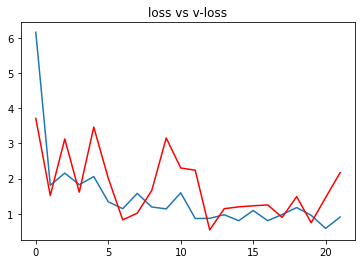

In [21]:
#plotting the relation between loss and valid loss of the model
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [22]:
# checking out the accuracy of our model on test data to detect the normal patient
acc = model.evaluate_generator(test)[1] 
print(f"The accuracy of your model is = {acc} %")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The accuracy of your model is = 0.9380000233650208 %


In [23]:
#checking the accuracy of the model on train data
model.evaluate_generator(train)[1]

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.9629999995231628

In [24]:
#checking the accuracy of the model on the validation data
model.evaluate_generator(valid)[1]

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.9585000276565552

<h4>MODEL TESTING ON IMAGES TO DETECT THE LABELS<h4>

In [25]:
#function to get the images
def get_img_array(img_path):
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  return img

In [26]:
#getting the path and detecting the label
path = "/content/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Test/normal/Normal-4501.png"      
img = get_img_array(path)
res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

The given X-Ray image is of type = Normal

The chances of image being Covid is : 0.0002586782102298457 percent

The chances of image being Normal is : 99.99977350234985 percent


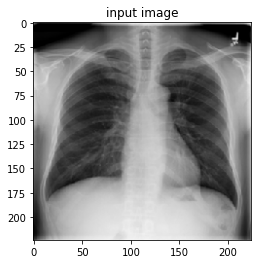

In [27]:
#display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

In [28]:
#checking the classificatio  reports 
Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(test.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['normal', 'covid']
print(classification_report(test.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[478  22]
 [ 38 462]]
Classification Report
              precision    recall  f1-score   support

      normal       0.93      0.96      0.94       500
       covid       0.95      0.92      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



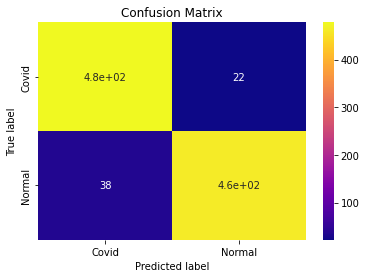

In [29]:
#plotting the confusion matrix 
classes = ['Covid','Normal']
tick_marks = [0.5,1.5]
sns.heatmap(confusion_matrix, annot = True,cmap='plasma',)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
# Let's now calculate the specificity and sensitivity
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
print('TP ==> {} \nTN ==> {} \n FP ==> {}\n FN ==> {}'.format(TP, TN, FP, FN))

TP ==> 462 
TN ==> 478 
 FP ==> 22
 FN ==> 38


In [31]:
#checking the specifity and sensitivity of the model
sensitivity = round(((TP / float(TP + FN)) * 100), 2)
specificity = round(((TN / float(TN + FP)) * 100), 2)
print('Our model has a sensitivity of {} % and specificity of {} %'.format(sensitivity, specificity))

Our model has a sensitivity of 92.4 % and specificity of 95.6 %


In [32]:
#checking the f1-score of the model
f=f1_score(test.classes, y_pred)
f

0.9390243902439026